In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.ticker as ticker
sns.__version__

'0.12.1'

In [2]:
def load_benchmark_and_annotate(filename, n_query, n_against):
    df = pd.read_csv(filename, sep='\t')
    df['n_query'] = int(n_query)
    df['n_against'] = int(n_against)
    
    return df

load_benchmark_and_annotate('benchmarks/a_100_vs_a.txt', 100, 10000)

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,8046.1403,2:14:06,10401.48,58493.38,10403.37,10403.95,72282.79,7.61,378.65,30478.66,100,10000


In [3]:
query_line = [ load_benchmark_and_annotate(f"benchmarks/a_{x}_vs_a.txt", x, 10000) for x in range(100, 1000, 100) ]
#query_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
query_line_df = pd.concat(query_line)
query_line_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,8046.1403,2:14:06,10401.48,58493.38,10403.37,10403.95,72282.79,7.61,378.65,30478.66,100,10000
0,6634.0672,1:50:34,10220.22,55552.64,10231.77,10232.34,60197.02,16.52,454.59,30161.81,200,10000
0,6791.2807,1:53:11,10283.14,50499.57,10275.11,10275.26,57833.04,23.31,448.54,30472.00,300,10000
0,5399.0796,1:29:59,10114.58,46904.75,10116.12,10116.37,47400.44,29.00,562.59,30399.56,400,10000
0,7236.9012,2:00:36,10306.49,58546.62,10235.79,10236.42,64539.15,35.26,446.27,32299.50,500,10000
0,8307.0373,2:18:27,10262.73,54648.19,10253.57,10254.16,69524.23,42.31,404.21,33580.93,600,10000
0,5935.0510,1:38:55,10436.12,51007.27,10450.90,10451.52,54838.95,50.85,562.69,33401.60,700,10000
0,6634.9251,1:50:34,10577.44,45540.72,10551.79,10552.37,57337.78,58.04,527.36,34999.19,800,10000
0,6092.0311,1:41:32,10244.95,45939.66,10276.76,10277.33,52401.86,66.00,595.16,36253.98,900,10000


In [4]:
against_line = [ load_benchmark_and_annotate(f"benchmarks/a_vs_a_{x}.txt", 1000, x) for x in range(1000, 10000, 1000) ]
#against_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
against_line_df = pd.concat(against_line)
against_line_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,190.5965,0:03:10,7835.11,13411.27,7682.85,7684.71,23.64,6.94,1537.50,2934.33,1000,1000
0,492.1393,0:08:12,9266.73,19072.92,9177.62,9178.36,2893.39,14.18,1306.44,6433.30,1000,2000
0,337.1346,0:05:37,9214.48,14774.27,8796.72,8800.22,221.05,21.63,2495.44,8417.19,1000,3000
0,1816.7844,0:30:16,10261.88,28934.04,10212.58,10213.18,17020.83,28.87,762.82,13863.96,1000,4000
0,4308.3585,1:11:48,10222.42,39749.15,10243.16,10243.61,40409.38,36.60,447.18,19284.64,1000,5000
0,630.2757,0:10:30,14661.50,21440.07,11802.65,11805.98,56128.57,43.01,2918.98,18401.39,1000,6000
0,4486.2303,1:14:46,10387.06,41859.28,10400.46,10401.07,40213.93,51.11,578.58,25962.25,1000,7000
0,5241.6019,1:27:21,10062.63,46267.62,10062.45,10062.98,0.00,0.00,565.28,29627.37,1000,8000
0,5638.5937,1:33:58,10485.32,43337.22,10510.07,10510.71,49704.38,66.75,577.80,32585.03,1000,9000


In [5]:
# for seaborn, we need these to be in a single dataframe
query_line_df['bench_type'] = "vary_n_queries"
query_line_df["varied_n"] = query_line_df['n_query']
against_line_df['bench_type'] = 'vary_n_subjects'
against_line_df['varied_n'] = against_line_df['n_against']

benchD = pd.concat([query_line_df, against_line_df])
benchD['min'] = benchD['s']/60
benchD.head()


,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against,bench_type,varied_n,min
0,8046.1403,2:14:06,10401.48,58493.38,10403.37,10403.95,72282.79,7.61,378.65,30478.66,100,10000,vary_n_queries,100,134.102338
0,6634.0672,1:50:34,10220.22,55552.64,10231.77,10232.34,60197.02,16.52,454.59,30161.81,200,10000,vary_n_queries,200,110.567787
0,6791.2807,1:53:11,10283.14,50499.57,10275.11,10275.26,57833.04,23.31,448.54,30472.00,300,10000,vary_n_queries,300,113.188012
0,5399.0796,1:29:59,10114.58,46904.75,10116.12,10116.37,47400.44,29.00,562.59,30399.56,400,10000,vary_n_queries,400,89.984660
0,7236.9012,2:00:36,10306.49,58546.62,10235.79,10236.42,64539.15,35.26,446.27,32299.50,500,10000,vary_n_queries,500,120.615020


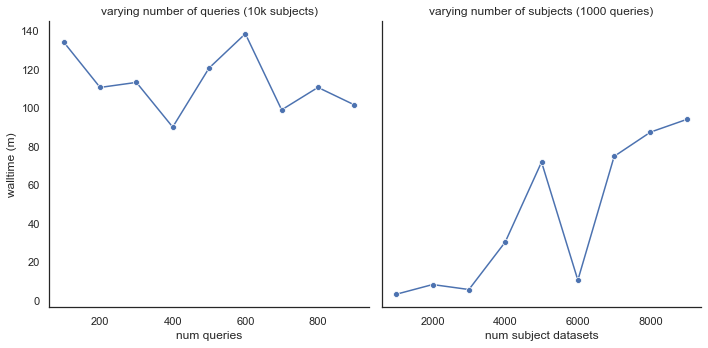

In [19]:
# seaborn version -- no real point to this bc we need to access
# the individual axes anyway, since we need diff labels. but here's the SAME PLOT
g = sns.relplot(data=benchD, x='varied_n', y='min', col="bench_type", \
                markers=True,marker="o",\
                kind='line', facet_kws=dict(sharex=False))
#g.set(ylim=(0, 35))

titles = ["varying number of queries (10k subjects)", 'varying number of subjects (1000 queries)']
x_labels = ['num queries', 'num subject datasets']
y_label = 'walltime (m)'
tick_dist=[200, 2000]

for n, ax in enumerate(g.axes.flat):
    ax.set_title(titles[n])
    ax.set_xlabel(x_labels[n])
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_dist[n]))

/Users/t/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


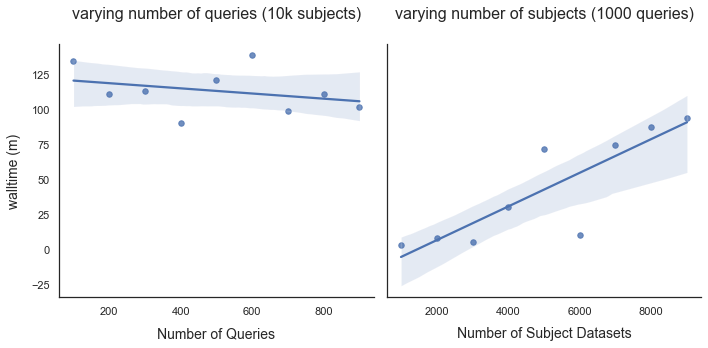

In [18]:
# linear regression version
g = sns.lmplot(data=benchD, x='varied_n', y='min', col="bench_type",
                markers="o",sharex=False, scatter_kws={"s": 30})              
#g.set(ylim=(0, 35))

titles = ["varying number of queries (10k subjects)", 'varying number of subjects (1000 queries)']
x_labels = ['Number of Queries', 'Number of Subject Datasets']
y_label = 'walltime (m)'
tick_dist=[200, 2000]

for n, ax in enumerate(g.axes.flat):
    ax.set_title(titles[n], size=16, pad=25)
    ax.set_xlabel(x_labels[n], size=14, labelpad=10)
    ax.set_ylabel(y_label, size=14, labelpad=10)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_dist[n]))

# a little more space between subplots
plt.subplots_adjust(wspace=0.15)
plt.tight_layout()
plt.savefig('subsample_benchmarks.svg')

In [8]:
def load_benchmark_replicate(filename, ident):
    df = pd.read_csv(filename, sep='\t')
    df['ident'] = ident
    
    return df

replicates_df = [ load_benchmark_replicate(f"benchmarks/a_vs_{x}.txt", x) for x in ('a','b','c','d','e')]
#query_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
replicates_df = pd.concat(replicates_df)
replicates_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,ident
0,6410.4036,1:46:50,10456.73,46762.75,10474.48,10474.75,54614.34,73.48,586.18,37592.65,a
0,10972.9724,3:02:52,10129.77,56932.70,10109.43,10110.02,84926.57,72.73,331.31,36359.01,b
0,6546.8879,1:49:06,10403.43,52091.42,10226.46,10227.06,59158.95,73.10,530.59,34751.04,c
0,8474.0678,2:21:14,10509.81,55628.16,10474.58,10475.17,74463.39,72.83,430.85,36527.69,d
0,6643.4003,1:50:43,10399.51,47443.64,10452.64,10453.31,57368.30,76.80,530.69,35255.88,e


In [9]:
# for seaborn, melt dataframe
replicates_df['mins'] = replicates_df['s']/60
replicates_df['max_rss_gb'] = replicates_df['max_rss']/1000
replicates_df['io_in_gb'] = replicates_df['io_in']/1000

val_vars = ['mins', 'max_rss_gb','io_in_gb'] # 'max_vms', 'max_uss','max_pss', 'io_in','io_out','mean_load','cpu_time']
melted_reps = pd.melt(replicates_df, id_vars = 'ident', value_vars=val_vars, var_name='benchmark',value_name='val')
melted_reps.head()

,ident,benchmark,val
0,a,mins,106.840060
1,b,mins,182.882873
2,c,mins,109.114798
3,d,mins,141.234463
4,e,mins,110.723338


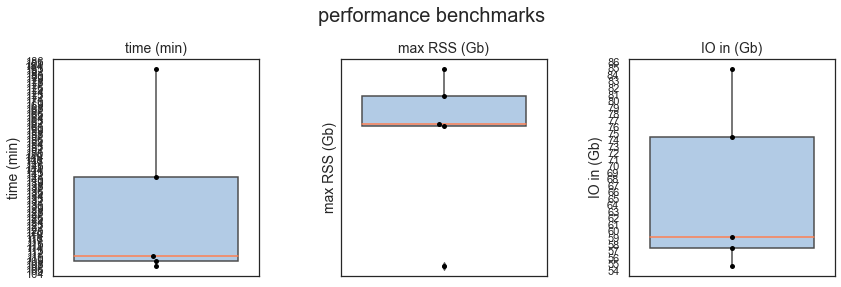

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=False)
fig.suptitle('performance benchmarks', size=20, y=1.06)

xlabels=['time (min)', 'max RSS (Gb)', 'IO in (Gb)']
ylabels=['min', 'Gb', 'Gb']

for n,val in enumerate(val_vars):
    sns.boxplot(ax=axes[n], data=replicates_df, y=val_vars[n],
                medianprops={"color": "coral"},showcaps=False,
                boxprops={"facecolor": (.4, .6, .8, .5)})#, notch=True)
    sns.swarmplot(ax=axes[n], data=replicates_df, y=val_vars[n], color='black')
    axes[n].yaxis.set_major_locator(ticker.MultipleLocator(1))
    axes[n].set_title(xlabels[n], size=14)

    #axes[n].set_xlabel(xlabels[n], size=14)
    axes[n].set_ylabel(xlabels[n], size=14)
plt.subplots_adjust(wspace=0.4)

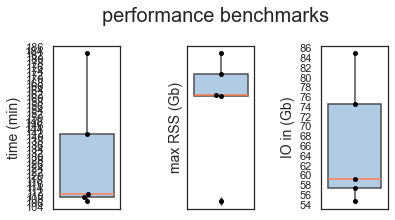

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharey=False)
fig.suptitle('performance benchmarks', size=20, y=1.06)

xlabels=['time (min)', 'max RSS (Gb)', 'IO in (Gb)']
ylabels=['min', 'Gb', 'Gb']

for n,val in enumerate(val_vars):
    sns.boxplot(ax=axes[n], data=replicates_df, y=val_vars[n],
                medianprops={"color": "coral"},showcaps=False,
                boxprops={"facecolor": (.4, .6, .8, .5)})#, notch=True)
    sns.swarmplot(ax=axes[n], data=replicates_df, y=val_vars[n], color='black')
    axes[n].yaxis.set_major_locator(ticker.MultipleLocator(2))
    #axes[n].set_title(xlabels[n], size=14)

    #axes[n].set_xlabel(xlabels[n], size=14)
    axes[n].set_ylabel(xlabels[n], size=14)
plt.subplots_adjust(wspace=1)

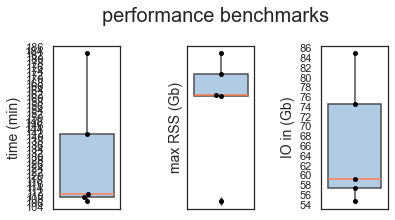

In [17]:
# add ylims 
fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharey=False)
fig.suptitle('performance benchmarks', size=20, y=1.06)

xlabels=['time (min)', 'max RSS (Gb)', 'IO in (Gb)']
ylabels=['min', 'Gb', 'Gb']
ylim= [(22,28), (14,20), (90,98)]

for n,val in enumerate(val_vars):
    sns.boxplot(ax=axes[n], data=replicates_df, y=val_vars[n],
                medianprops={"color": "coral"},showcaps=False,
                boxprops={"facecolor": (.4, .6, .8, .5)})#, notch=True)
    sns.swarmplot(ax=axes[n], data=replicates_df, y=val_vars[n], color='black')
    axes[n].yaxis.set_major_locator(ticker.MultipleLocator(2))
    #axes[n].set_title(xlabels[n], size=14)

    #axes[n].set_xlabel(xlabels[n], size=14)
    axes[n].set_ylabel(xlabels[n], size=14)
#    axes[n].set_ylim(ylim[n])
plt.subplots_adjust(wspace=1)

In [13]:
def load_threads_benchmark_and_annotate(filename, n_threads):
    df = pd.read_csv(filename.format(threads=n_threads), sep='\t')
    df['threads'] = n_threads
    
    return df


x = [ load_threads_benchmark_and_annotate(f'benchmarks/a_vs_a_1000_t{t}.txt', t) for t in (4,8,16) ]
x.append(load_threads_benchmark_and_annotate(f'benchmarks/a_vs_a_1000.txt', 32))

threads_df = pd.concat(x)

In [14]:
threads_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,threads
0,635.5993,0:10:35,2276.08,10742.91,2258.54,2263.37,0.00,7.33,376.03,2394.75,4
0,366.8955,0:06:06,3893.58,13670.58,3891.74,3894.74,106.28,7.14,658.99,2422.29,8
0,241.8623,0:04:01,4217.00,13616.37,4178.51,4181.75,0.00,7.04,1126.57,2729.88,16
0,190.5965,0:03:10,7835.11,13411.27,7682.85,7684.71,23.64,6.94,1537.50,2934.33,32


In [15]:
threads_df['mins'] = threads_df['s']/60
threads_df['max_rss_gb'] = threads_df['max_rss']/1000
threads_df['cpu_time_min'] = threads_df['cpu_time']/60

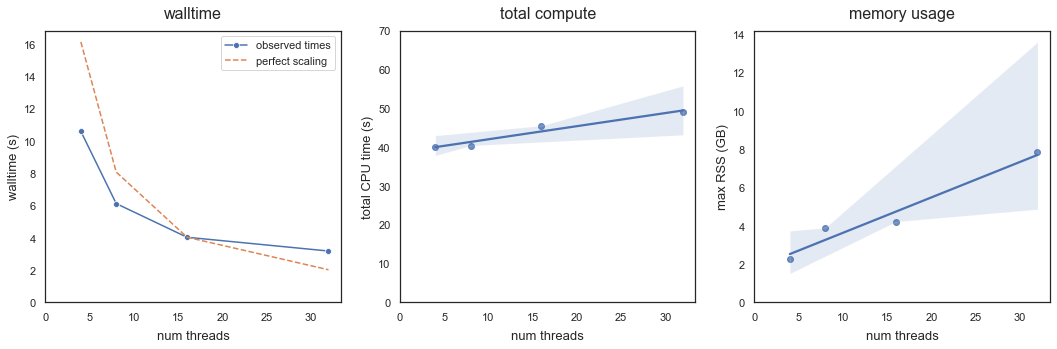

In [16]:
# seaborn version (doesn't change much)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

ax = axs[0]
sns.lineplot(data=threads_df,x="threads", y="mins",ax=ax, marker='o', label='observed times')
#ax.plot(threads_df.threads, threads_df.s, '-p', label='observed times')
ax.plot([4, 8, 16, 32], [(484 * 2)/60, 484/60, (484 / 2)/60, (484 / 4)/60], '--', label='perfect scaling')
ax.axis(xmin=0, ymin=0)
ax.set_xlabel('num threads', size=13, labelpad=8)
ax.set_ylabel('walltime (s)', size=13)
ax.set_title('walltime', size=16, pad=12)
ax.legend(loc='upper right')

ax = axs[1]
sns.regplot(data=threads_df,x="threads", y="cpu_time_min",ax=ax, marker='o')
#ax.plot(threads_df.threads, threads_df.cpu_time, '-p')
ax.axis(xmin=0, ymin=0, ymax=70)
ax.set_xlabel('num threads', size=13, labelpad=8)
ax.set_ylabel('total CPU time (s)', size=13)
ax.set_title('total compute', size=16, pad=12)

ax = axs[2]
#ax.plot(threads_df.threads, threads_df.max_rss, '-p')
sns.regplot(data=threads_df,x="threads", y="max_rss_gb",ax=ax, marker='o')
ax.axis(xmin=0, ymin=0)
ax.set_xlabel('num threads', size=13, labelpad=8)
ax.set_ylabel('max RSS (GB)', size=13)
ax.set_title('memory usage', size=16, pad=12)

plt.savefig('basic_benchmarks.svg')